<a href="https://colab.research.google.com/github/anuytok/4-HW-RNA-seq/blob/main/Ribo_seq_%D0%95%D1%84%D0%B8%D0%BC%D0%BE%D0%B2%D0%B0_%D0%90%D0%BD%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1iqYLFVKySREVm5Kn5NagMeHaDi-dVLcj

Downloading...
From: https://drive.google.com/uc?id=1iqYLFVKySREVm5Kn5NagMeHaDi-dVLcj
To: /content/HSE_RiboSeq_HT.zip
100% 4.84M/4.84M [00:00<00:00, 36.8MB/s]


In [ ]:
!unzip HSE_RiboSeq_HT.zip

Archive:  HSE_RiboSeq_HT.zip
   creating: HSE_RiboSeq_HT/
  inflating: __MACOSX/._HSE_RiboSeq_HT  
  inflating: HSE_RiboSeq_HT/02. RiboSeq_EColi_track_r.wig  
  inflating: __MACOSX/HSE_RiboSeq_HT/._02. RiboSeq_EColi_track_r.wig  
  inflating: HSE_RiboSeq_HT/02. RiboSeq_EColi_track_f.wig  
  inflating: __MACOSX/HSE_RiboSeq_HT/._02. RiboSeq_EColi_track_f.wig  
  inflating: HSE_RiboSeq_HT/01. RiboSeq_RNASeq_HCC_counts.tsv  
  inflating: __MACOSX/HSE_RiboSeq_HT/._01. RiboSeq_RNASeq_HCC_counts.tsv  


In [137]:
import pandas as pd

counts = pd.read_csv("HSE_RiboSeq_HT/01. RiboSeq_RNASeq_HCC_counts.tsv", sep="\t")
genes = list(counts["geneSymbol"])
counts = counts.fillna(value = 0)
counts.index = counts['geneID']
del counts["geneSymbol"], counts["geneID"]

counts

,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,LC034-tumor-RPF,...,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA
geneID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,0,0,402,873,0,0,301,1627,0,0,...,218,457,0,0,200,889,0,0,161,857.0
ENSG00000000005.5,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0.0
ENSG00000000419.12,168,239,88,187,114,439,66,201,325,117,...,92,170,109,357,60,244,141,173,56,83.0
ENSG00000000457.13,65,121,60,106,36,163,70,156,130,76,...,127,176,67,176,55,261,64,100,68,176.0
ENSG00000000460.16,8,43,18,70,16,76,4,63,44,14,...,124,437,7,167,34,201,6,61,9,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000282988.1,0,0,1,39,0,0,0,5,0,0,...,0,31,0,6,0,62,0,0,1,17.0
ENSG00000283013.1,0,4,27,5,0,32,20,51,0,6,...,81,52,1,0,9,42,0,10,3,40.0
ENSG00000283039.1,0,0,0,0,0,0,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [138]:
counts_T = counts.T

counts_T['index'] = counts_T.index
counts_T['Seq'] = counts_T["index"].apply(lambda s: s.split("-")[2])

RNA = counts_T.loc[counts_T['Seq'] == 'RNA']
RPF = counts_T.loc[counts_T['Seq'] == 'RPF']

del RNA["index"], RNA["Seq"], RPF["index"], RPF["Seq"]

RNA = RNA.T
RPF = RPF.T

RNA

,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RNA,LC034-tumor-RNA,LC501-normal-RNA,LC501-tumor-RNA,LC502-normal-RNA,LC502-tumor-RNA,LC505-normal-RNA,LC505-tumor-RNA,LC506-normal-RNA,LC506-tumor-RNA,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RNA,LC509-tumor-RNA
geneID,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,402.0,873.0,301.0,1627.0,258.0,65.0,226.0,353.0,208.0,399.0,153.0,361.0,157.0,333.0,218.0,457.0,200.0,889.0,161.0,857.0
ENSG00000000005.5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000419.12,88.0,187.0,66.0,201.0,80.0,16.0,54.0,165.0,57.0,174.0,61.0,155.0,104.0,114.0,92.0,170.0,60.0,244.0,56.0,83.0
ENSG00000000457.13,60.0,106.0,70.0,156.0,77.0,67.0,78.0,68.0,97.0,128.0,76.0,185.0,114.0,74.0,127.0,176.0,55.0,261.0,68.0,176.0
ENSG00000000460.16,18.0,70.0,4.0,63.0,60.0,4.0,17.0,112.0,28.0,14.0,8.0,118.0,25.0,98.0,124.0,437.0,34.0,201.0,9.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000282988.1,1.0,39.0,0.0,5.0,1.0,25.0,0.0,11.0,3.0,26.0,0.0,1.0,2.0,8.0,0.0,31.0,0.0,62.0,1.0,17.0
ENSG00000283013.1,27.0,5.0,20.0,51.0,12.0,49.0,16.0,47.0,43.0,132.0,23.0,46.0,50.0,102.0,81.0,52.0,9.0,42.0,3.0,40.0
ENSG00000283039.1,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


1.1. Для каждого гена найдите коэффициент корреляции числа каунтов между экспериментами RNA-Seq и Ribo-Seq. Какую корреляцию вы выберете — Пирсона или Спирмана? Обратите внимание, что перед вами не нормированные на глубину библиотеки каунты, учтите это при анализе.

Задание сформулировано так, что нормировать запрещается, поэтому корреляцию Пирсона точно нельзя использовать: слишком разный масштаб у данных. Поэтому используем Спирмана, для него не важен масштаб.

In [ ]:
import numpy as np
from scipy.stats import spearmanr

In [139]:
spearman_arr = []
indexes = []
rna = 0
rpf = 0

for i in range (len(RNA)):
  for j in range (20):
    rna = rna + RNA.iloc[i:i+1, j:j+1].to_numpy()
    rpf = rpf + RPF.iloc[i:i+1, j:j+1].to_numpy()
  if rna !=0 and rpf !=0:
    spearman = spearmanr(RNA.iloc[i:i+1, :], RPF.iloc[i:i+1, :], axis = 1)[0]
    spearman_arr.append(spearman)
    indexes.append(RNA.index[i])
  rna = 0
  rpf = 0  

correlation = pd.DataFrame(data = spearman_arr, columns = ['Spearman correlation'], index = indexes)
correlation

,Spearman correlation
ENSG00000000005.5,-0.139424
ENSG00000000419.12,0.849624
ENSG00000000457.13,0.697779
ENSG00000000460.16,0.811583
ENSG00000000938.12,0.518673
...,...
ENSG00000282881.1,0.117872
ENSG00000282936.1,-0.258195
ENSG00000282988.1,0.382301
ENSG00000283013.1,0.191364


1.2. Постройте гистограмму распределения этих
коэффициентов корреляции. Для каких генов корреляция самая высокая, а
для каких — самая низкая? Как вы можете это объяснить?

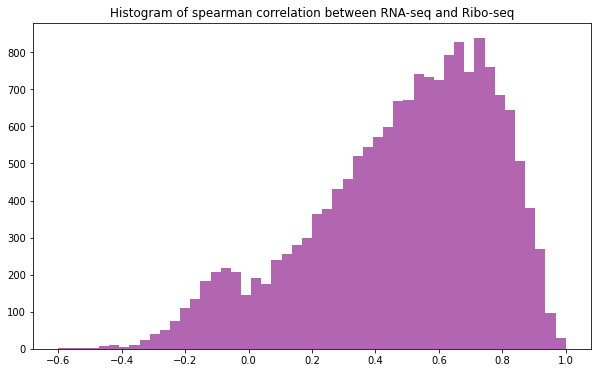

In [140]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(spearman_arr, bins=50, alpha=0.6, color = 'purple')
ax.set_title('Histogram of spearman correlation between RNA-seq and Ribo-seq')
plt.show()

Возьмем в качестве генов с высокой корреляции те, коэффициент корреляции которых больше 0.9, а с низкой те, у которых он меньш или равен -0.4

In [141]:
correlation = correlation.sort_values('Spearman correlation', ascending = False)
high = correlation[correlation['Spearman correlation'] > 0.9]
low = correlation[correlation['Spearman correlation'] <= -0.4]

Вытащим из датасетов с каунтами по РНК-секу и Рибо-секу те гены, корреляция которых высокая или низкая

In [142]:
RNA['index'] = RNA.index
RPF['index'] = RPF.index

high_index = high.index
low_index = low.index

high_df_RNA = RNA[RNA['index'].isin(high_index)]
low_df_RNA = RNA[RNA['index'].isin(low_index)]

high_df_RPF = RPF[RPF['index'].isin(high_index)]
low_df_RPF = RPF[RPF['index'].isin(low_index)]

Посмотрим на датасеты и для примера возьмем несколько генов из топа с высокой и низкой корреляцией из РНК-сека и Рибо-сека

In [155]:
high_genes = ['ENSG00000001036.13', 'ENSG00000003989.16', 'ENSG00000006453.13', 'ENSG00000008517.16']
low_genes = ['ENSG00000146067.15', 'ENSG00000179965.11', 'ENSG00000203896.9', 'ENSG00000242028.5']

high_df_RNA = RNA[RNA['index'].isin(high_genes)]
high_df_RPF = RPF[RPF['index'].isin(high_genes)]

low_df_RNA = RNA[RNA['index'].isin(low_genes)]
low_df_RPF = RPF[RPF['index'].isin(low_genes)]

high_correlation = high_df_RNA.merge(high_df_RPF)
high_correlation.index = high_genes

low_correlation = low_df_RNA.merge(low_df_RPF)
low_correlation.index = low_genes

del high_correlation["index"], low_correlation["index"]

high_correlation = high_correlation.T
low_correlation = low_correlation.T

high_correlation['index'] = high_correlation.index
low_correlation['index'] = low_correlation.index

high_correlation['tissue'] = high_correlation["index"].apply(lambda s: s.split("-")[1])
high_correlation['Seq'] = high_correlation["index"].apply(lambda s: s.split("-")[2])

low_correlation['tissue'] = low_correlation["index"].apply(lambda s: s.split("-")[1])
low_correlation['Seq'] = low_correlation["index"].apply(lambda s: s.split("-")[2])

del high_correlation["index"], low_correlation["index"]

high_correlation

,ENSG00000001036.13,ENSG00000003989.16,ENSG00000006453.13,ENSG00000008517.16,tissue,Seq
LC001-normal-RNA,199.0,2097.0,137.0,832.0,normal,RNA
LC001-tumor-RNA,432.0,1747.0,332.0,43.0,tumor,RNA
LC033-normal-RNA,128.0,2805.0,100.0,1087.0,normal,RNA
LC033-tumor-RNA,424.0,1049.0,423.0,1915.0,tumor,RNA
LC034-normal-RNA,203.0,4860.0,212.0,1870.0,normal,RNA
LC034-tumor-RNA,189.0,155.0,644.0,333.0,tumor,RNA
LC501-normal-RNA,155.0,2760.0,137.0,952.0,normal,RNA
LC501-tumor-RNA,383.0,1571.0,257.0,304.0,tumor,RNA
LC502-normal-RNA,134.0,1299.0,214.0,807.0,normal,RNA
LC502-tumor-RNA,1177.0,2190.0,909.0,662.0,tumor,RNA


Построим scatter plot: по Х - каунты RNA-seq, по У - каунты Ribo-seq. Посмотрим сначала как меняется зависимость у генов с высокой корреляцией, затем как у генов с низкой корреляцией.

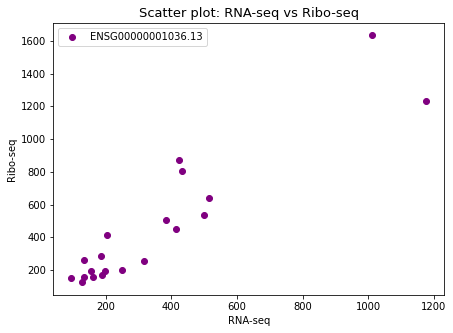

In [150]:
plt.subplots(figsize=(7,5))

FUCA2 = plt.scatter(high_correlation.iloc[:20, 0:1], high_correlation.iloc[20:40, 0:1], 
            c='purple', label='ENSG00000001036.13')

plt.title('Scatter plot: RNA-seq vs Ribo-seq', fontsize=13)
plt.xlabel("RNA-seq")
plt.ylabel("Ribo-seq")

plt.legend(loc='upper left')
plt.show()

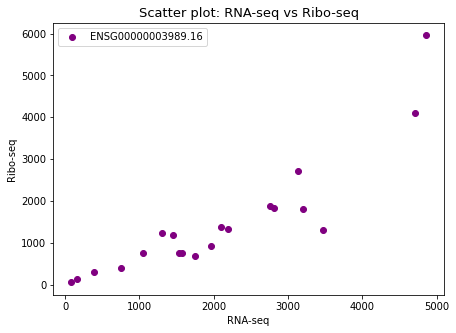

In [151]:
plt.subplots(figsize=(7,5))

plt.scatter(high_correlation.iloc[:20, 1:2], high_correlation.iloc[20:40, 1:2], 
           c='purple', label='ENSG00000003989.16')

plt.title('Scatter plot: RNA-seq vs Ribo-seq', fontsize=13)
plt.xlabel("RNA-seq")
plt.ylabel("Ribo-seq")

plt.legend(loc='upper left')
plt.show()

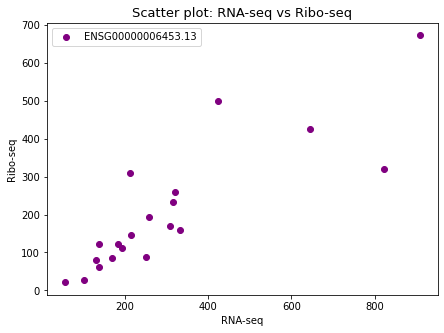

In [152]:
plt.subplots(figsize=(7,5))

HIST1H4D = plt.scatter(high_correlation.iloc[:20, 2:3], high_correlation.iloc[20:40, 2:3], 
            c='purple', label='ENSG00000006453.13')

plt.title('Scatter plot: RNA-seq vs Ribo-seq', fontsize=13)
plt.xlabel("RNA-seq")
plt.ylabel("Ribo-seq")

plt.legend(loc='upper left')
plt.show()

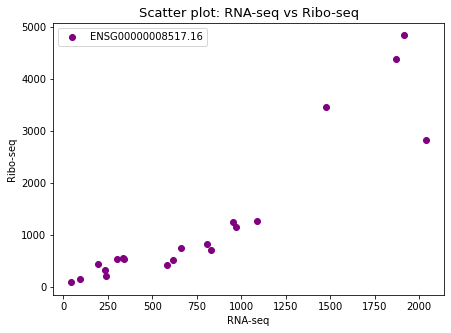

In [153]:
plt.subplots(figsize=(7,5))

HIST1H3C = plt.scatter(high_correlation.iloc[:20, 3:4], high_correlation.iloc[20:40, 3:4], 
            c='purple', label='ENSG00000008517.16')

plt.title('Scatter plot: RNA-seq vs Ribo-seq', fontsize=13)
plt.xlabel("RNA-seq")
plt.ylabel("Ribo-seq")

plt.legend(loc='upper left')
plt.show()

Итого, для выбранных для примера генов с высоким коэффициентом корреляции Спирмана можно проследить корреляцию числа каунтов в РНК-секе и Рибо-секе по образцам. Не совсем линейная зависимость, но что-то похожее прослеживается.

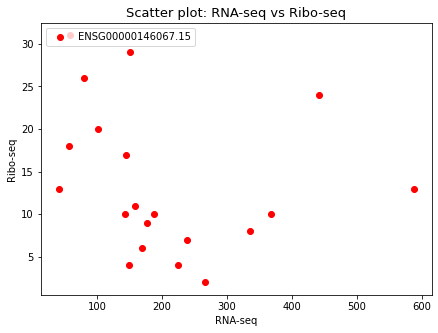

In [156]:
plt.subplots(figsize=(7,5))

FUCA2 = plt.scatter(low_correlation.iloc[:20, 0:1], low_correlation.iloc[20:40, 0:1], 
            c='red', label='ENSG00000146067.15')

plt.title('Scatter plot: RNA-seq vs Ribo-seq', fontsize=13)
plt.xlabel("RNA-seq")
plt.ylabel("Ribo-seq")

plt.legend(loc='upper left')
plt.show()

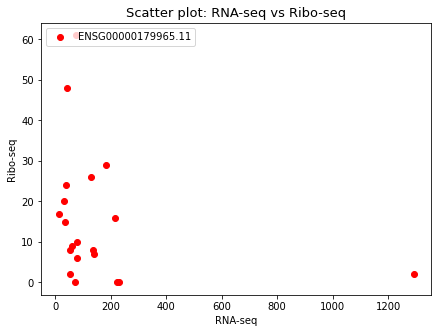

In [157]:
plt.subplots(figsize=(7,5))

FUCA2 = plt.scatter(low_correlation.iloc[:20, 1:2], low_correlation.iloc[20:40, 1:2], 
            c='red', label='ENSG00000179965.11')

plt.title('Scatter plot: RNA-seq vs Ribo-seq', fontsize=13)
plt.xlabel("RNA-seq")
plt.ylabel("Ribo-seq")

plt.legend(loc='upper left')
plt.show()

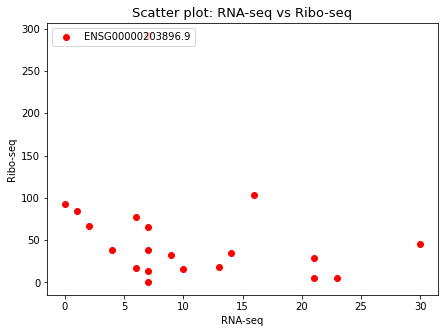

In [158]:
plt.subplots(figsize=(7,5))

FUCA2 = plt.scatter(low_correlation.iloc[:20, 2:3], low_correlation.iloc[20:40, 2:3], 
            c='red', label='ENSG00000203896.9')

plt.title('Scatter plot: RNA-seq vs Ribo-seq', fontsize=13)
plt.xlabel("RNA-seq")
plt.ylabel("Ribo-seq")

plt.legend(loc='upper left')
plt.show()

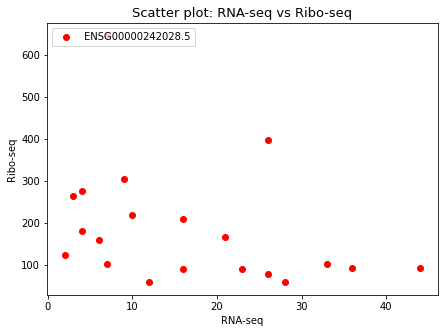

In [159]:
plt.subplots(figsize=(7,5))

FUCA2 = plt.scatter(low_correlation.iloc[:20, 3:4], low_correlation.iloc[20:40, 3:4], 
            c='red', label='ENSG00000242028.5')

plt.title('Scatter plot: RNA-seq vs Ribo-seq', fontsize=13)
plt.xlabel("RNA-seq")
plt.ylabel("Ribo-seq")

plt.legend(loc='upper left')
plt.show()

Итого, как и ожидалось, никакой корреляции между каунтами генов с низким коэффициентом корреляции Спирмана не наблюдается. В генах с высокой степенью корреляции по Спирману мы видели что-то похожее на линейную зависимость, а на этих графиках точки беспорядочно разбросаны. 

Таким образом, высокая/низкая корреляция генов между РНК-сек и Рибо-сек может объясняться наличием/отсутствием зависимости их каунтов в обоих секах.

Кроме scatter plot, можно построить boxplot и посмотреть, как меняется распределение каунтов генов в нормальных и опухолевых образцах РНК-сека и Рибо-сека.

Сначала для генов с высоким коэффициентом корреляции

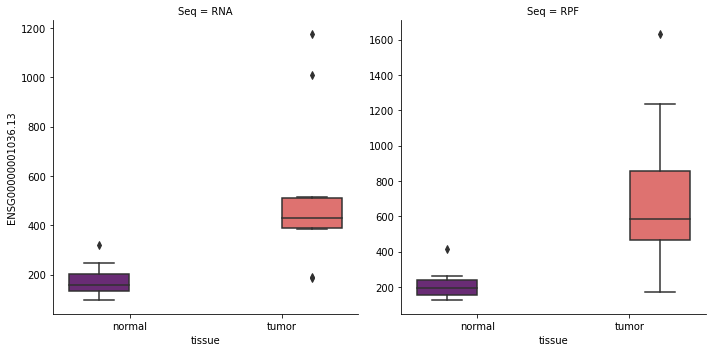

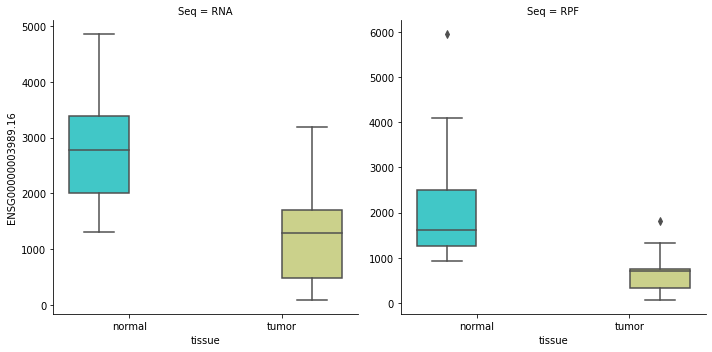

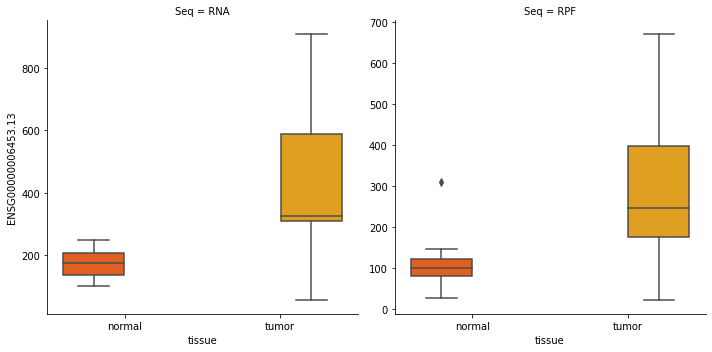

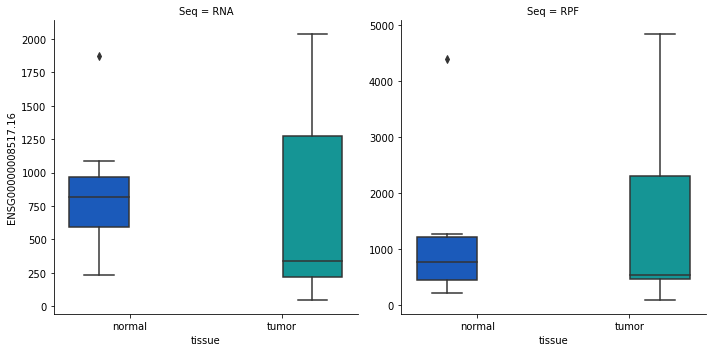

In [160]:
import seaborn as sns

sns.catplot(data=high_correlation, kind='box', col='Seq', x='tissue', y='ENSG00000001036.13', 
            hue='tissue', sharey=False, height=5, palette = 'magma')
sns.catplot(data=high_correlation, kind='box', col='Seq', x='tissue', y='ENSG00000003989.16', 
            hue='tissue', sharey=False, height=5, palette = 'rainbow')
sns.catplot(data=high_correlation, kind='box', col='Seq', x='tissue', y='ENSG00000006453.13', 
            hue='tissue', sharey=False, height=5, palette = 'autumn')
sns.catplot(data=high_correlation, kind='box', col='Seq', x='tissue', y='ENSG00000008517.16', 
            hue='tissue', sharey=False, height=5, palette = 'winter')

По boxplot видим, что экспрессия генов зависит от конкретного типа ткани, откуда был взят образец. Так, 3 гена высоко экспрессированы в опухолевой ткани, а 1 высоко экспрессирован в нормальной ткани. Это может быть связано с биологическими процессами регуляции транскрипции этих генов.

Построим boxplot для генов с низким коэффициентом корреляции.

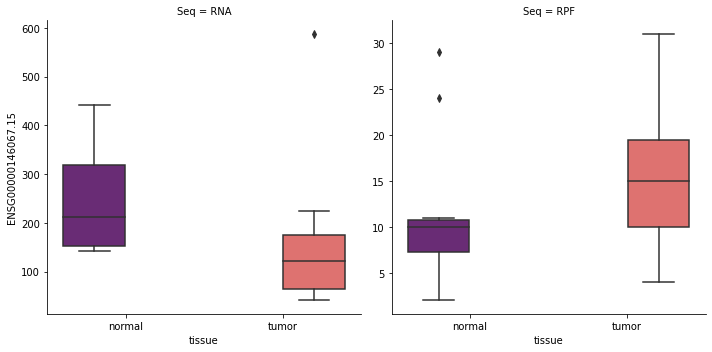

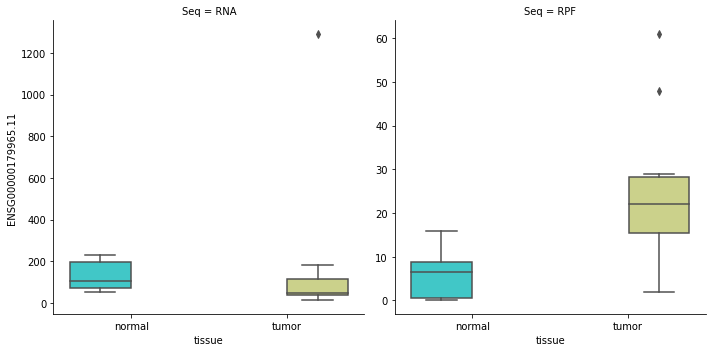

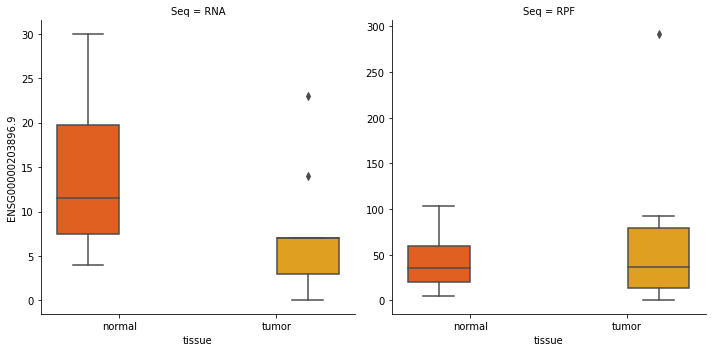

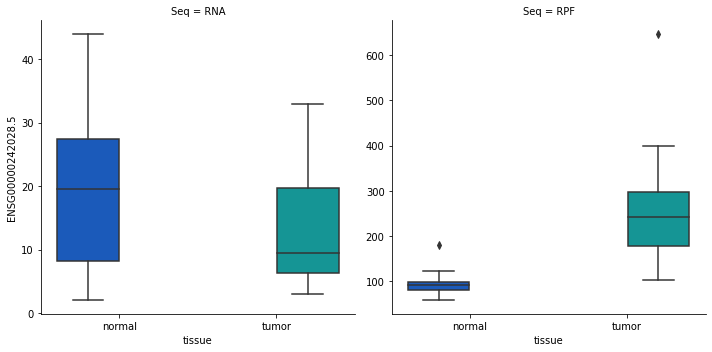

In [161]:
sns.catplot(data=low_correlation, kind='box', col='Seq', x='tissue', y='ENSG00000146067.15', 
            hue='tissue', sharey=False, height=5, palette = 'magma')
sns.catplot(data=low_correlation, kind='box', col='Seq', x='tissue', y='ENSG00000179965.11',
            hue='tissue', sharey=False, height=5, palette = 'rainbow')
sns.catplot(data=low_correlation, kind='box', col='Seq', x='tissue', y='ENSG00000203896.9', 
            hue='tissue', sharey=False, height=5, palette = 'autumn')
sns.catplot(data=low_correlation, kind='box', col='Seq', x='tissue', y='ENSG00000242028.5', 
            hue='tissue', sharey=False, height=5, palette = 'winter')

Итак, можно заметить, что у генов с низким коэффициентом корреляции не прослеживается зависимость уровня экспрессии от типа ткани. Когда в нормальной ткани ген экспрессирован высоко, то в опухолевой его уровень экспресии невысокий, и наоборот. Значит, у генов с низкой корреляцией нет зависимости уровня экспрессии от типа ткани.

1.3. Проанализируйте распределение каунтов Ribo-seq:
постройте зависимость дисперсии от среднего. Похоже ли это на
NB-распределение? Если нет, то на какое похоже? Если да, то какие
статистические тесты можно использовать для подтверждения того, что перед
вами NB-распределение?


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3721: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


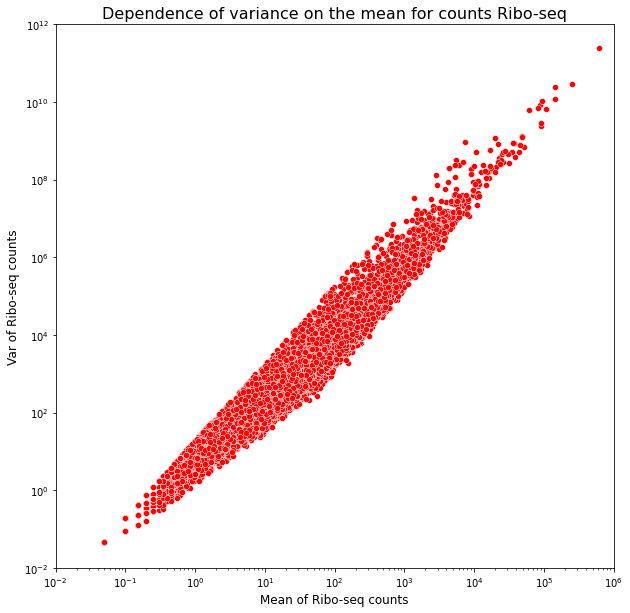

In [162]:
RPF_mean = np.mean(RPF, axis=1)
RPF_var = np.var(RPF, axis=1)

RPF_mean = RPF_mean.to_numpy()
RPF_var = RPF_var.to_numpy()

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x = RPF_mean, y = RPF_var, color = 'red')
ax.set_xlabel("Mean of Ribo-seq counts", fontsize = 12)
ax.set_ylabel("Var of Ribo-seq counts", fontsize = 12)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("Dependence of variance on the mean for counts Ribo-seq", fontsize = 16)
ax.set(xlim=(10**(-2),10**6),ylim=(10**(-2),10**12))
plt.show()

Похоже на негативное биномиальное распределение. Потвердим это тестом Колмогорова-Смирнова. Подадим в качестве параметров массив средних и дисперсий.

In [163]:
import scipy
from scipy import stats
from scipy.stats import kstest

stats.kstest(RPF_mean, RPF_var)

KstestResult(statistic=0.4483504882554764, pvalue=0.0)

pvalue < 0.05, тогда гипотеза о том что это NB распределение подтверждается.

#DESeq2

1.4. а) Найдите дифференциально экспрессированные гены по
RNA-Seq между нормой и опухолью. Для этого можете использовать DESeq2
или edgeR (для DESeq есть обёртка на Python). 

б) Постройте volcano plot. 

То же самое сделайте и для Ribo-Seq эксперимента. 

в) Совпадают ли результаты
дифференциальной экспрессии? Какие гены оказались значимо различны по
экспрессии в одном случае, а какие — в другом? 

г) Проведите похожий анализ,
только с поиском генов с разницей в эффективности трансляции (~ method +
condition + method:condition). 

д) Что вы скажете о наборе генов, который
вы получили этим методом? Выводы подкрепите графиками.

In [170]:
!Rscript -e 'install.packages(c("BiocManager"), repos="https://cloud.r-project.org")'

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/BiocManager_1.30.19.tar.gz'
Content type 'application/x-gzip' length 264151 bytes (257 KB)
downloaded 257 KB

* installing *source* package ‘BiocManager’ ...
** package ‘BiocManager’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (BiocManager)

The downloaded source packages are in
	‘/tmp/RtmpX5trBe/downloaded_packages’


In [171]:
!Rscript -e 'BiocManager::install("DESeq2")'

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 Patched (2022-11-10
  r83330)
Old packages: 'bit', 'data.table', 'devtools', 'gert', 'htmltools', 'jsonlite',
  'knitr', 'openssl', 'pkgload', 'roxygen2', 'sass', 'stringr', 'testthat',
  'tidyverse', 'vctrs', 'whisker', 'xfun', 'boot', 'foreign'
Warning message:
package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'DESeq2' 


In [172]:
!pip install rpy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [173]:
from rpy2.robjects.packages import importr
from rpy2.robjects import default_converter, Formula, pandas2ri
from rpy2.robjects.conversion import localconverter, rpy2py

from rpy2.robjects.methods import RS4

pandas2ri.activate()
with localconverter(default_converter + pandas2ri.converter):
    base = importr("base")
    DESeq2 = importr("DESeq2")

a) Найдем дифференциально экспрессированные гены по
RNA-Seq между нормой и опухолью.

In [166]:
del RNA['index']

Создаем метадату

In [177]:
meta_RNA = pd.DataFrame({"Tissue": (["Normal","Tumor"])*10}, index=RNA.columns)
meta_RNA

,Tissue
LC001-normal-RNA,Normal
LC001-tumor-RNA,Tumor
LC033-normal-RNA,Normal
LC033-tumor-RNA,Tumor
LC034-normal-RNA,Normal
LC034-tumor-RNA,Tumor
LC501-normal-RNA,Normal
LC501-tumor-RNA,Tumor
LC502-normal-RNA,Normal
LC502-tumor-RNA,Tumor


Вычислим коэффициенты нормализации

In [178]:
with localconverter(default_converter + pandas2ri.converter):
  dds = DESeq2.DESeqDataSetFromMatrix(countData=RNA, colData=meta_RNA, design=Formula("~ Tissue"))
  dds = DESeq2.DESeq(dds)

In [179]:
with localconverter(default_converter + pandas2ri.converter):
  res_RNA = DESeq2.results(dds, name="Tissue_Tumor_vs_Normal")
  res_RNA = pd.DataFrame(base.as_data_frame(res_RNA))
  res_RNA.index = RNA.index
  res_RNA = res_RNA.sort_values("padj")
  res_RNA = res_RNA.loc[res_RNA["padj"] < 0.05]
  res_RNA = res_RNA.loc[res_RNA["log2FoldChange"].abs() >= 1]

res_RNA 

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
geneID,,,,,,
ENSG00000182566.12,187.902511,-6.224294,0.471543,-13.199842,8.791966e-40,1.464478e-35
ENSG00000138315.12,207.433311,-4.190143,0.372389,-11.252055,2.262593e-29,1.884400e-25
ENSG00000166148.3,216.785200,-4.836026,0.444956,-10.868551,1.627649e-27,8.917125e-24
ENSG00000129965.13,517.466267,-5.941896,0.547969,-10.843493,2.141352e-27,8.917125e-24
ENSG00000160339.15,154.170314,-5.700993,0.527201,-10.813696,2.964778e-27,9.876861e-24
...,...,...,...,...,...,...
ENSG00000163623.9,1.061851,-3.385997,1.382016,-2.450042,1.428394e-02,4.955791e-02
ENSG00000007372.20,5.881090,-2.306814,0.941536,-2.450055,1.428345e-02,4.955791e-02
ENSG00000178171.10,1.577899,-3.042140,1.242339,-2.448720,1.433647e-02,4.971807e-02


Найдем дифференциально экспрессированные гены по
Ribo-Seq между нормой и опухолью.

In [180]:
del RPF['index']

Создаем метадату

In [181]:
meta_RPF = pd.DataFrame({"Tissue": (["Normal","Tumor"])*10}, index=RPF.columns)
meta_RPF

,Tissue
LC001-normal-RPF,Normal
LC001-tumor-RPF,Tumor
LC033-normal-RPF,Normal
LC033-tumor-RPF,Tumor
LC034-normal-RPF,Normal
LC034-tumor-RPF,Tumor
LC501-normal-RPF,Normal
LC501-tumor-RPF,Tumor
LC502-normal-RPF,Normal
LC502-tumor-RPF,Tumor


Вычислим коэффициенты нормализации

In [182]:
with localconverter(default_converter + pandas2ri.converter):
  dds = DESeq2.DESeqDataSetFromMatrix(countData=RPF, colData=meta_RPF, design=Formula("~ Tissue"))
  dds = DESeq2.DESeq(dds)

In [183]:
with localconverter(default_converter + pandas2ri.converter):
  res_RPF = DESeq2.results(dds, name="Tissue_Tumor_vs_Normal")
  res_RPF = pd.DataFrame(base.as_data_frame(res_RPF))
  res_RPF.index = RPF.index
  res_RPF = res_RPF.sort_values("padj")
  res_RPF = res_RPF.loc[res_RPF["padj"] < 0.05]
  res_RPF = res_RPF.loc[res_RPF["log2FoldChange"].abs() >= 1]

res_RPF 

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
geneID,,,,,,
ENSG00000087237.10,234.706196,-3.661168,0.328144,-11.157205,6.603531e-29,9.219850e-25
ENSG00000138315.12,378.527099,-4.123941,0.384101,-10.736618,6.850819e-27,4.782557e-23
ENSG00000145850.8,115.823325,-4.410428,0.424721,-10.384291,2.923339e-25,1.360522e-21
ENSG00000152990.13,351.272069,-3.789142,0.368147,-10.292473,7.619383e-25,2.659546e-21
ENSG00000104938.16,60.025648,-6.019149,0.589470,-10.211112,1.768264e-24,4.937702e-21
...,...,...,...,...,...,...
ENSG00000127191.17,40.570419,1.344821,0.514720,2.612724,8.982373e-03,4.945264e-02
ENSG00000125398.5,63.848284,1.603262,0.613808,2.611991,9.001665e-03,4.950030e-02
ENSG00000007520.3,40.195427,1.102950,0.422365,2.611366,9.018143e-03,4.955810e-02


б) Построим volcano plot для RNA-seq

In [188]:
!pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 86 kB 3.2 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58662 sha256=59011a8435534a77fa2af6f2016e4436d2a771d1b7371a83ebbd7e59196a59ae
  Stored in directory: /root/.cache/pip/wheels/93/5b/a8/2be2669621c3c344d362eb6703e5fd7b6ece47a6b5ab35b207
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=d358d4e4b3cd62fddd5c8a6aa80ab99f776f072458d16d2f8337fa0bd65e954d
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
Successfully built bioinfokit adjustText


In [262]:
from bioinfokit import visuz

RNA_volcano = pd.DataFrame({"log2FoldChange": res_RNA['log2FoldChange'], 
                            'padj': res_RNA['padj']}, 
                           index=res_RNA.index)

visuz.GeneExpression.volcano(df=RNA_volcano, lfc='log2FoldChange', pv='padj', 
                             lfc_thr = (2,2), pv_thr = (0.05, 0.05),
                             plotlegend=True, legendpos='upper right', sign_line = True, 
                             figname = 'Volcano plot RNA-seq')

Картинка сохраняется в png формате

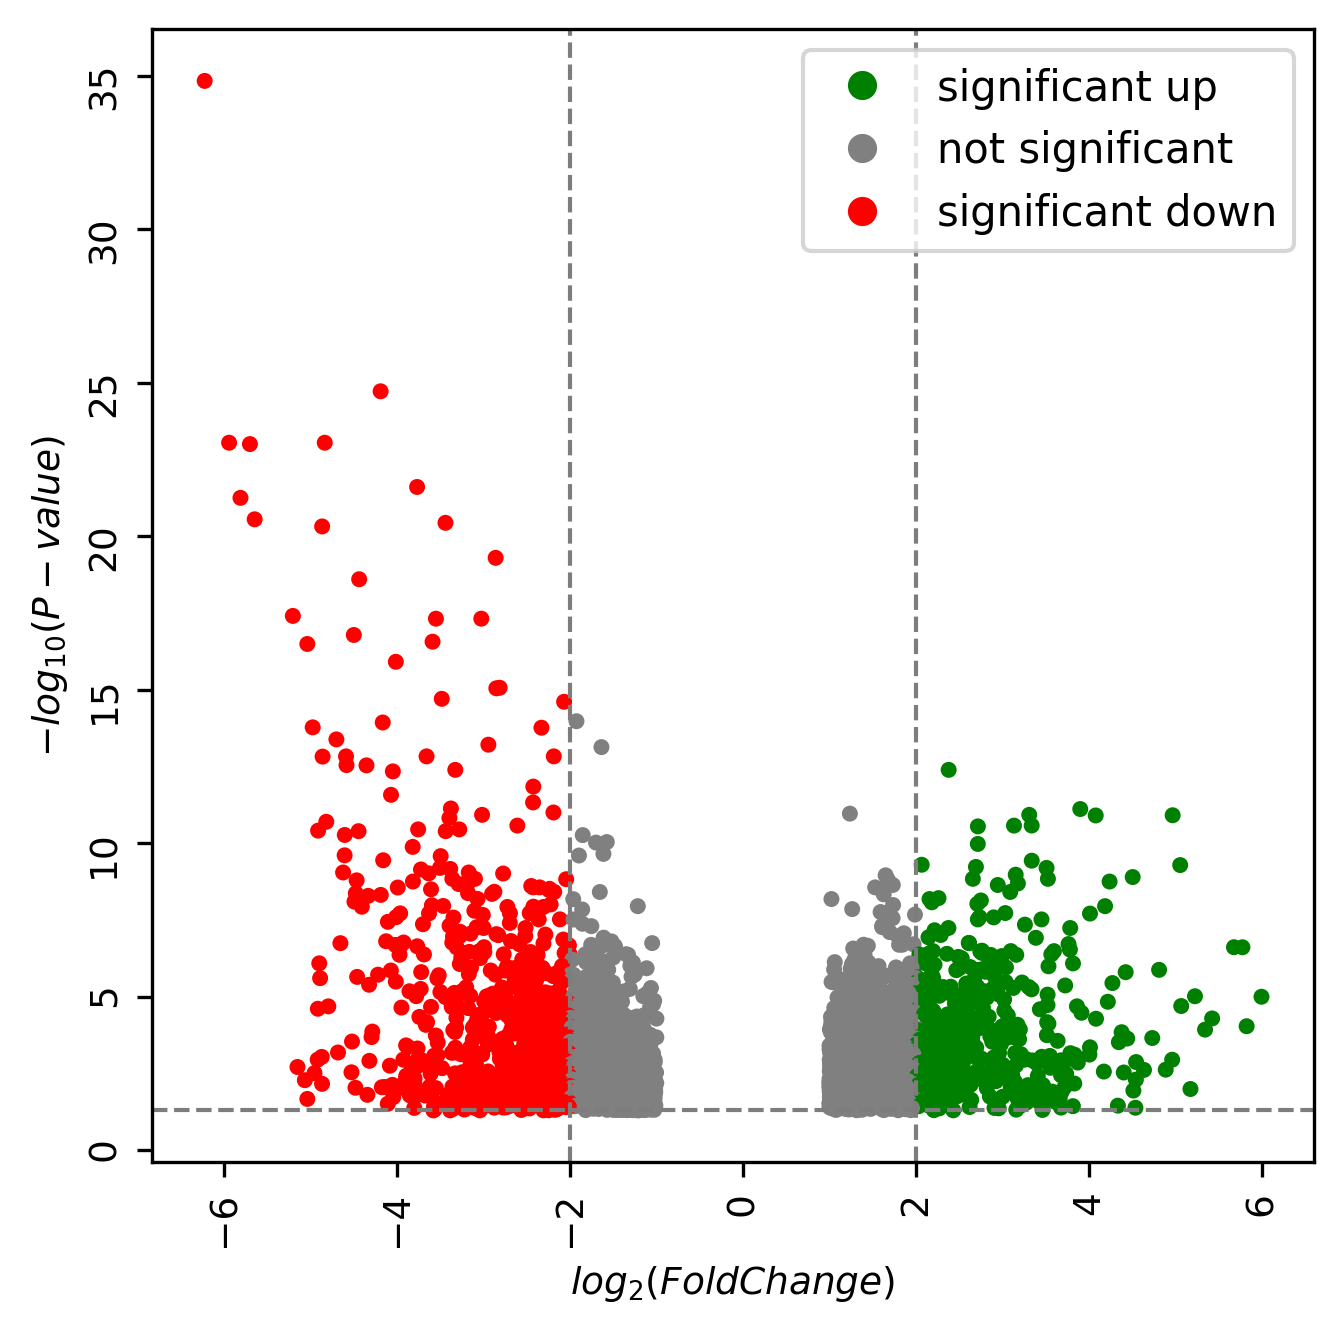

Нашла метод с интерактивным графиком, где наводя на точки видны названия генов

In [234]:
import plotly.graph_objects as go
import plotly.express as px

In [253]:
res_RNA['negative_log_padj'] = np.log10(res_RNA['padj']) * (-1)

In [254]:
fig = go.Figure()
trace1 = go.Scatter(
 x=res_RNA['log2FoldChange'],
 y=res_RNA['negative_log_padj'],
 mode='markers',
 name='RNA-seq DESeq2',
 hovertext=list(res_RNA.index)
)

In [255]:
fig.add_trace(trace1)
fig.update_layout(
    title="Volcano plot RNA-seq",
    xaxis_title="Log 2 (FoldChage)",
    yaxis_title="-log 10 (padj)",
)
fig.show()

Теперь для Ribo-seq

In [263]:
RPF_volcano = pd.DataFrame({"log2FoldChange": res_RPF['log2FoldChange'], 
                            'padj': res_RPF['padj']}, 
                           index=res_RPF.index)

visuz.GeneExpression.volcano(df=RPF_volcano, lfc='log2FoldChange', pv='padj', 
                             lfc_thr = (2,2), pv_thr = (0.05, 0.05),
                             plotlegend=True, legendpos='upper right', sign_line = True, 
                             figname = 'Volcano plot Ribo-seq')

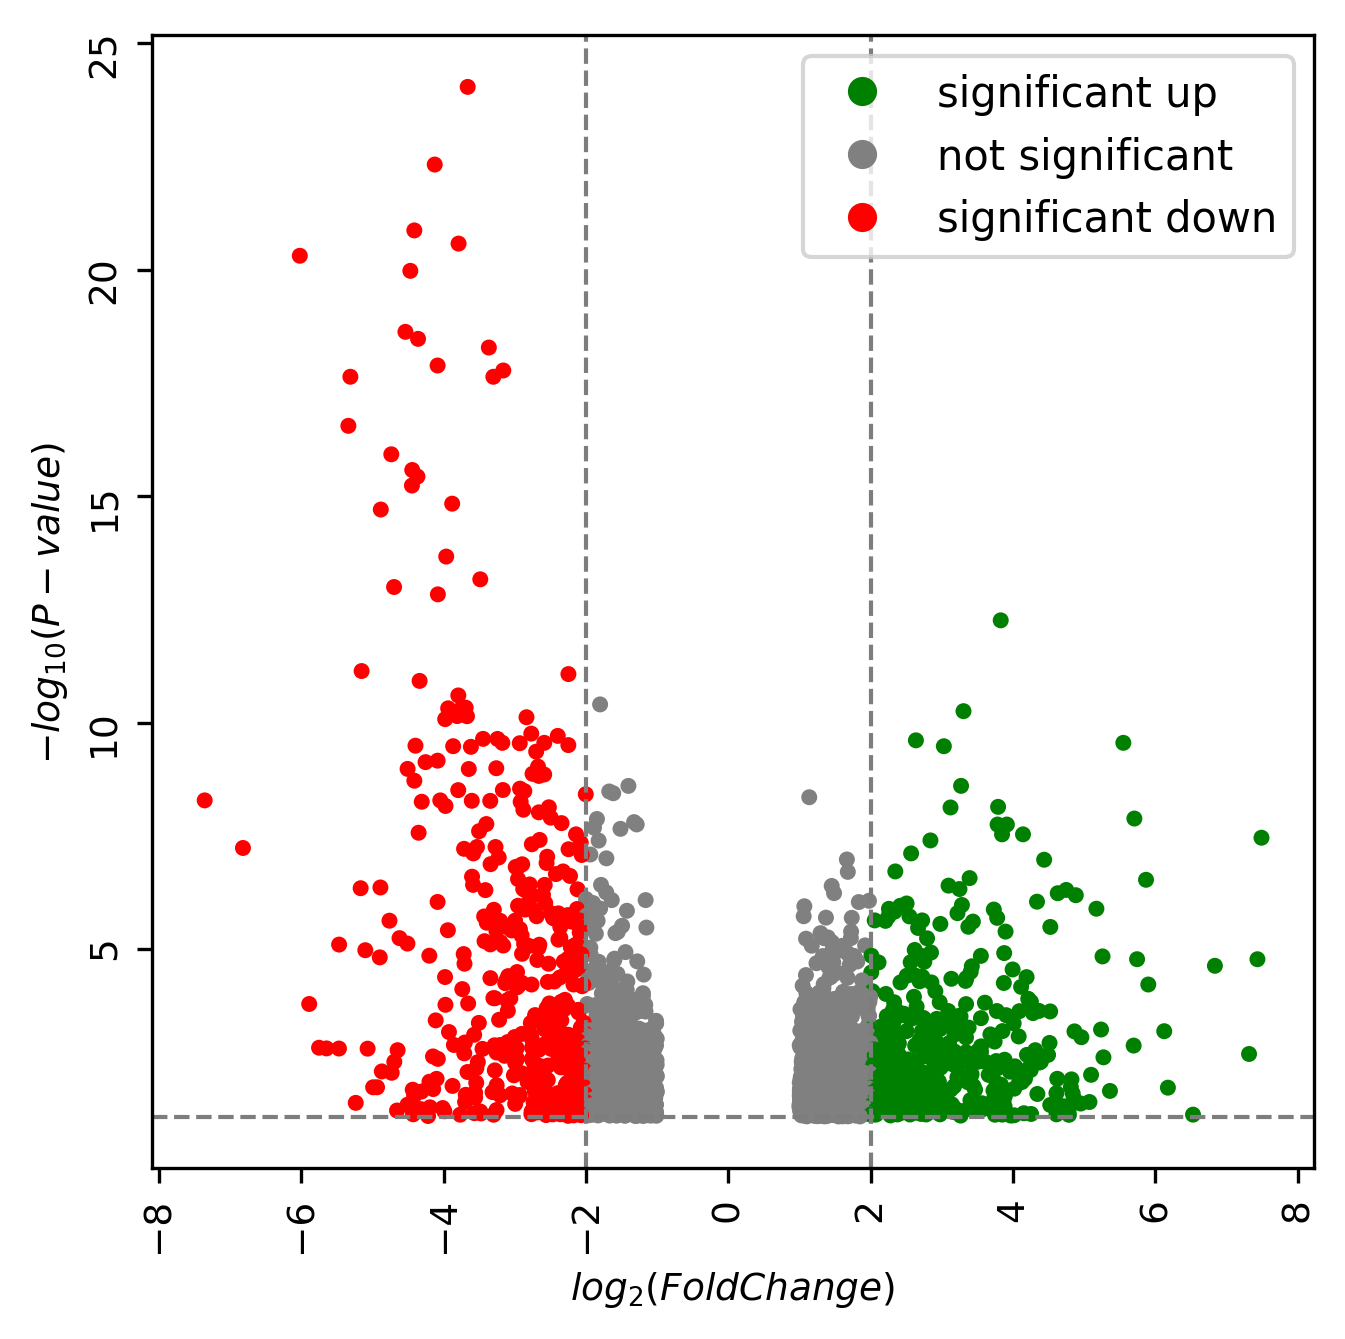

In [259]:
res_RPF['negative_log_padj'] = np.log10(res_RPF['padj']) * (-1)

In [260]:
fig = go.Figure()
trace2 = go.Scatter(
 x=res_RPF['log2FoldChange'],
 y=res_RPF['negative_log_padj'],
 mode='markers',
 name='Ribo-seq DESeq2',
 hovertext=list(res_RPF.index)
)

In [261]:
fig.add_trace(trace2)
fig.update_layout(
    title="Volcano plot Ribo-seq",
    xaxis_title="Log 2 (FoldChage)",
    yaxis_title="-log 10 (padj)",
)
fig.show()

в) Совпадают ли результаты дифференциальной экспрессии? Какие гены оказались значимо различны по экспрессии в одном случае, а какие — в другом?

г) Проведите похожий анализ, только с поиском генов с разницей в эффективности трансляции (~ method + condition + method:condition).

In [ ]:
(~ method + condition + method:condition)

In [ ]:
del RNA['index']

Создаем метадату

In [ ]:
meta_RNA = pd.DataFrame({"Tissue": (["Normal","Tumor"])*10}, index=RNA.columns)
meta_RNA

,Tissue
LC001-normal-RNA,Normal
LC001-tumor-RNA,Tumor
LC033-normal-RNA,Normal
LC033-tumor-RNA,Tumor
LC034-normal-RNA,Normal
LC034-tumor-RNA,Tumor
LC501-normal-RNA,Normal
LC501-tumor-RNA,Tumor
LC502-normal-RNA,Normal
LC502-tumor-RNA,Tumor


Вычислим коэффициенты нормализации

In [ ]:
with localconverter(default_converter + pandas2ri.converter):
  dds = DESeq2.DESeqDataSetFromMatrix(countData=RNA, colData=meta_RNA, design=Formula("~ Tissue"))
  dds = DESeq2.DESeq(dds)

In [ ]:
with localconverter(default_converter + pandas2ri.converter):
  res_RNA = DESeq2.results(dds, name="Tissue_Tumor_vs_Normal")
  res_RNA = pd.DataFrame(base.as_data_frame(res_RNA))
  res_RNA.index = RNA.index
  res_RNA = res_RNA.sort_values("padj")
  res_RNA = res_RNA.loc[res_RNA["padj"] < 0.05]
  res_RNA = res_RNA.loc[res_RNA["log2FoldChange"].abs() >= 1]

res_RNA 

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
geneID,,,,,,
ENSG00000182566.12,187.902511,-6.224294,0.471543,-13.199842,8.791966e-40,1.464478e-35
ENSG00000138315.12,207.433311,-4.190143,0.372389,-11.252055,2.262593e-29,1.884400e-25
ENSG00000166148.3,216.785200,-4.836026,0.444956,-10.868551,1.627649e-27,8.917125e-24
ENSG00000129965.13,517.466267,-5.941896,0.547969,-10.843493,2.141352e-27,8.917125e-24
ENSG00000160339.15,154.170314,-5.700993,0.527201,-10.813696,2.964778e-27,9.876861e-24
...,...,...,...,...,...,...
ENSG00000163623.9,1.061851,-3.385997,1.382016,-2.450042,1.428394e-02,4.955791e-02
ENSG00000007372.20,5.881090,-2.306814,0.941536,-2.450055,1.428345e-02,4.955791e-02
ENSG00000178171.10,1.577899,-3.042140,1.242339,-2.448720,1.433647e-02,4.971807e-02
